# Newton's Method for Optimization
<i>(published on 15-April-2016)</i> <br>
see <a href="http://cslab.org/blog/newton-method">my blog</a> for further details.

Let's try to find the maxima of a gaussian distribution using Newton's method. <br>
We show that Newton's method works only when we are close to the optimum.

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


$ f(x) = e^{- \frac{x^2}{2} }$ is an un-normalized gaussian distribution whose maximum is at x=0

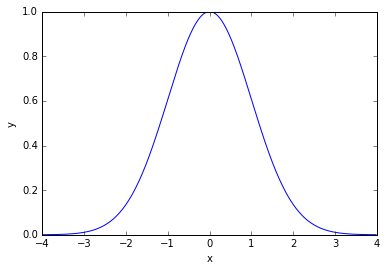

In [7]:
x = np.arange(-4, 4, 0.02)
y = np.exp(-(x * x)/2)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


The <b>Taylor series</b> (quadratic) approximation to the function at x=a is $f(a) + (x-a) f^{'}(a)+ (x-a)^2 f^{"}(a)/2$

$f^{'}(x) = -x e^{-x^2/2}$ and $f^{"}(x) = e^{-x^2/2} (x^2 - 1)$ <br>
$x-a = \Delta x = -f^{'}(a)/f^{"}(a) = \frac{a}{a^2-1}$, gives the maximum of the quadratic approximation.

In [8]:
def f(x):
    return np.exp(-x*x/2)

# first derivative
def f_d(x):
    return -x * f(x)

# second derivative
def f_d_d(x):
    return (x*x-1) * f(x)

##### Quadratic approximation at x=a when a>1 or a<-1
In this case, the curvature at a is inverted and the point will move farther away from 0.

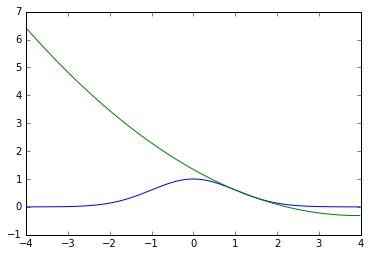

In [131]:
# z is the approximation at x=2
a = 1.2
x = np.arange(-4, 4, 0.02)
z = f(a) + (x-a)*f_d(a) + (x-a)*(x-a)*f_d_d(a)/2
plt.plot(x, y, x, z)
#plt.axis([1, 3, 0, 0.5])
plt.show()


The Newton update is $ x_{n+1} = x_n - \frac{f^{'}(a)}{f^{"}(a)}$

We see that for a>1 or a<-1 Newton's method won't work for our gaussian function. The value will approach $+\infty$ or $-\infty$ in stead of 0.

In [9]:
# update xn
a = 1.2
xn = a - f_d(a)/f_d_d(a)
print xn

3.92727272727


##### Quadratic approximation when $1/\sqrt2 < a < 1 $ or $ -1 < a < -1/\sqrt2$ <br>
In this case, the curvature is upright, but xn will move farther to the other side of 0. <br>
(when a = $1/\sqrt 2$, xn will be $-1/\sqrt 2$ and when a=$-1/\sqrt 2$, xn will be $1/\sqrt 2$

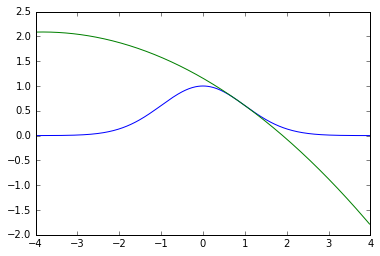

-3.83684210526


In [126]:
a = 0.9
z = f(a) + (x-a)*f_d(a) + (x-a)*(x-a)*f_d_d(a)/2
plt.plot(x, y, x, z)
#plt.axis([1, 3, 0, 0.5])
plt.show()

# update xn
xn = a - f_d(a)/f_d_d(a)
print xn

##### When |a| < $1/\sqrt 2$

Newton's method will converge in this case.

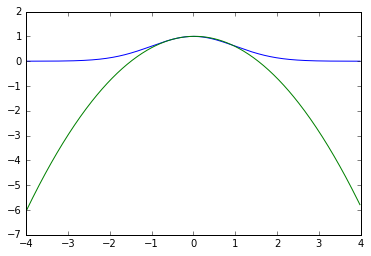

0.0296703296703


In [128]:
a = -0.3
z = f(a) + (x-a)*f_d(a) + (x-a)*(x-a)*f_d_d(a)/2
plt.plot(x, y, x, z)
#plt.axis([1, 3, 0, 0.5])
plt.show()

# update xn
xn = a - f_d(a)/f_d_d(a)
print xn

##### Where is the value $1\sqrt 2$ coming from??

we have $x_n = a + \Delta x = a + \frac{a}{a^2-1} = \frac{a^3}{a^2-1}$

Let's plot the difference between magnitudes of previous value a and the next value $x_n$.
It is 0 at $1/\sqrt 2$

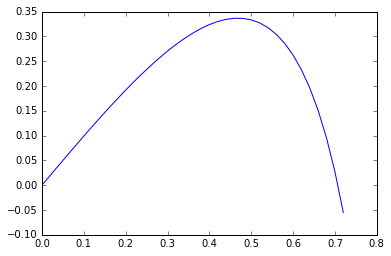

0.333333333333


In [121]:
def g(x):
    return np.abs(x) - np.abs(x**3/(x*x - 1.0))

p = np.arange(0,0.73, 0.02)
q = g(p)
plt.plot(p, q)
plt.show()
print g(0.5)
